In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
consumo_espana= pd.read_csv("totales_vino_y_otros.csv", sep = ";")
#fuente_2 = "https://datos.gob.es/en/catalogo?q=informe_consumo_nacional_datos_noviembre_2024"

consumo_semanal = pd.read_csv('bebidas_c_semanal.csv', sep = ";")
#fuente_3 = "https://datos.gob.es/en/catalogo?q=informe_bebidas_alcoholicas"

In [5]:
consumo_espana.columns

Index(['Códigos de gasto con cantidad física', 'Cantidades medias consumidas',
       'Periodo', 'Total'],
      dtype='object')

In [6]:
# Filtrar filas relacionadas con cualquier tipo de vino
vinos = consumo_espana[consumo_espana['Códigos de gasto con cantidad física'].str.contains('Vinos de uva|Otros vinos|bebidas a base de vino', case=False, na=False)]

# Crear un nuevo DataFrame llamado consumo_totales
consumo_totales = vinos.copy()

# Verificar el contenido del nuevo DataFrame
consumo_totales.head()

,Códigos de gasto con cantidad física,Cantidades medias consumidas,Periodo,Total
4968,02.1.2.1 T Vinos de uva (L),Cantidad consumida total (miles de unidades),2023,388.679
4969,02.1.2.1 T Vinos de uva (L),Cantidad consumida total (miles de unidades),2022,416.372
4970,02.1.2.1 T Vinos de uva (L),Cantidad consumida total (miles de unidades),2021,453.380
4971,02.1.2.1 T Vinos de uva (L),Cantidad consumida total (miles de unidades),2020,479.431
4972,02.1.2.1 T Vinos de uva (L),Cantidad consumida total (miles de unidades),2019,445.608


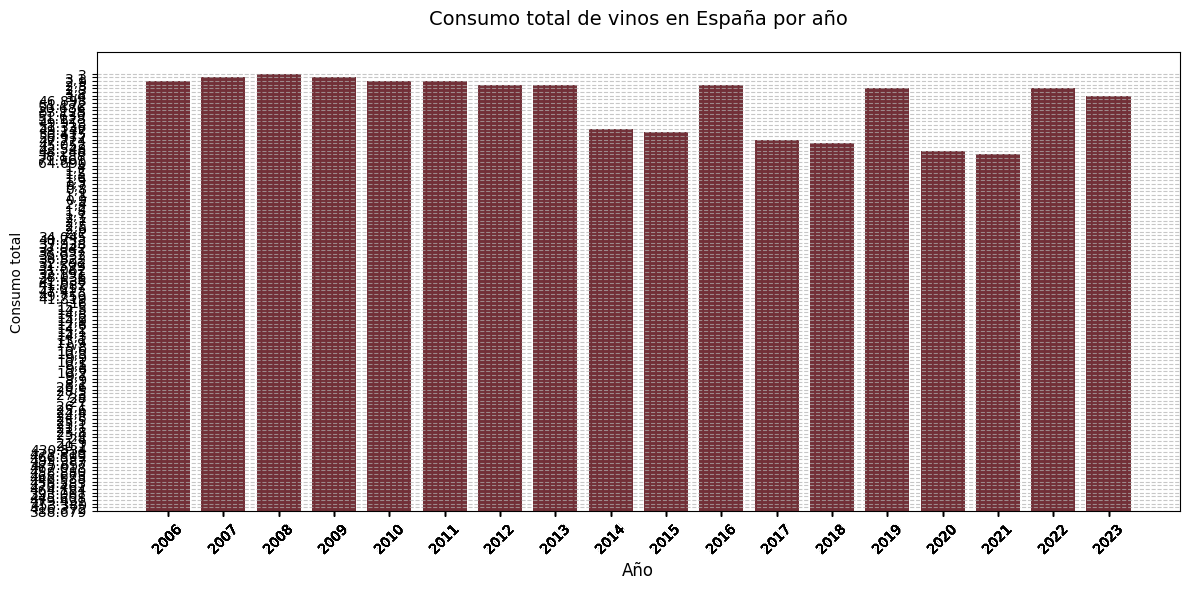

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(consumo_totales['Periodo'], consumo_totales['Total'], color='#722f37')
plt.title('Consumo total de vinos en España por año', fontsize=14, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Consumo total')
plt.xticks(consumo_totales['Periodo'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
consumo_totales.columns

Index(['Códigos de gasto con cantidad física', 'Cantidades medias consumidas',
       'Periodo', 'Total'],
      dtype='object')

In [ ]:
# Guardar el DataFrame "consumo_totales" como un archivo CSV
consumo_totales.to_csv("consumo_totales.csv", index=False)

In [ ]:
consumo_totales.describe()

,Periodo
count,216.000000
mean,2014.500000
std,5.200179
min,2006.000000
25%,2010.000000
50%,2014.500000
75%,2019.000000
max,2023.000000


In [ ]:
# Dataset de consumo semanal de bebidas alcoholicas en españa
consumo_semanal.iloc[4:8]

,Sexo,Bebidas alcohólicas,Distribución semanal,Total
4,Ambos sexos,Vinos o cava,TOTAL,100
5,Ambos sexos,Vinos o cava,Solo el fin de semana (V-D),"46,59"
6,Ambos sexos,Vinos o cava,Solo entre semana (L-J),"2,58"
7,Ambos sexos,Vinos o cava,Ambos indistintamente,"50,83"


In [ ]:
consumo_semanal.describe()

,Sexo,Bebidas alcohólicas,Distribución semanal,Total
count,72,72,72,72
unique,3,6,4,55
top,Ambos sexos,Cerveza con alcohol,TOTAL,100
freq,24,12,18,18


In [ ]:
consumo_semanal.columns

Index(['Sexo', 'Bebidas alcohólicas', 'Distribución semanal', 'Total'], dtype='object')

In [ ]:
vinos_semanales = consumo_semanal[consumo_semanal['Bebidas alcohólicas'].str.contains('vino', case=False, na=False)]
vinos_semanales

,Sexo,Bebidas alcohólicas,Distribución semanal,Total
4,Ambos sexos,Vinos o cava,TOTAL,100
5,Ambos sexos,Vinos o cava,Solo el fin de semana (V-D),"46,59"
6,Ambos sexos,Vinos o cava,Solo entre semana (L-J),"2,58"
7,Ambos sexos,Vinos o cava,Ambos indistintamente,"50,83"
28,Hombres,Vinos o cava,TOTAL,100
29,Hombres,Vinos o cava,Solo el fin de semana (V-D),"39,55"
30,Hombres,Vinos o cava,Solo entre semana (L-J),"2,48"
31,Hombres,Vinos o cava,Ambos indistintamente,"57,97"
52,Mujeres,Vinos o cava,TOTAL,100
53,Mujeres,Vinos o cava,Solo el fin de semana (V-D),"58,47"


## Trabajando con dataset "vinos_semanales"

In [ ]:
vinos_semanales.to_csv("vinos_semanales.csv", index=False)
print(vinos_semanales.columns)

Index(['Sexo', 'Bebidas alcohólicas', 'Distribución semanal', 'Total'], dtype='object')


In [ ]:
# Reorganizar el DataFrame para un formato más claro
vinos_organizado = vinos_semanales.pivot(index='Sexo', columns='Distribución semanal', values='Total')

# Asegurarnos de que las columnas estén en el orden correcto
vinos_organizado = vinos_organizado[['Solo el fin de semana (V-D)', 'Solo entre semana (L-J)', 'Ambos indistintamente']]

# Ver el resultado
vinos_organizado

Distribución semanal,Solo el fin de semana (V-D),Solo entre semana (L-J),Ambos indistintamente
Sexo,,,
Ambos sexos,"46,59","2,58","50,83"
Hombres,"39,55","2,48","57,97"
Mujeres,"58,47","2,75","38,78"


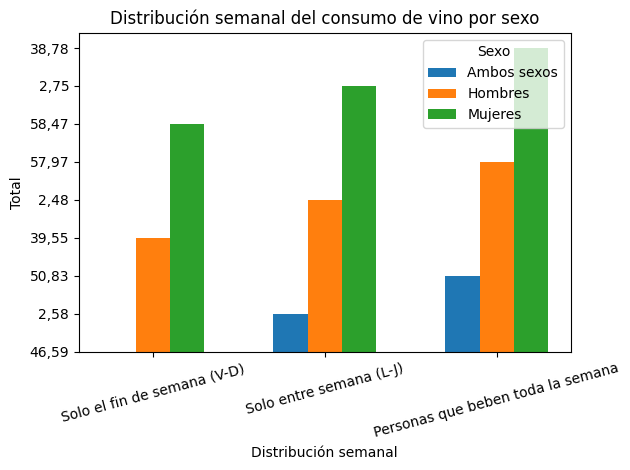

In [ ]:
import matplotlib.pyplot as plt

# Actualizar las categorías con nombres más apropiados
categorias = ['Solo el fin de semana (V-D)', 'Solo entre semana (L-J)', 'Personas que beben toda la semana']
sexos = vinos_organizado.index  # Índices como etiquetas para sexo
valores = vinos_organizado.values  # Valores como matriz

# Configuración del gráfico
ancho = 0.2  # Ancho de las barras
x = range(len(categorias))  # Posiciones para categorías

# Crear barras agrupadas
for i, sexo in enumerate(sexos):
    plt.bar([pos + ancho*i for pos in x], valores[i], width=ancho, label=sexo)

# Añadir etiquetas, título y leyenda
plt.xticks([pos + ancho for pos in x], categorias, rotation=15)
plt.xlabel('Distribución semanal')
plt.ylabel('Total')
plt.title('Distribución semanal del consumo de vino por sexo')
plt.legend(title='Sexo')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
